<a href="https://colab.research.google.com/github/ArpitShourya/Spam_Filtering_System_using_Naive_Bayes/blob/main/Soft_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DATA LOADING**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
cv=CountVectorizer()
wn=nltk.WordNetLemmatizer()
stopw=stopwords.words('english')
punct=string.punctuation

In [ ]:
sd=pd.read_csv(r"spam.csv", encoding='ISO-8859-1')

In [ ]:
sd.shape

(5572, 5)

In [ ]:
sd.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sd.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
sd.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
sd.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
sd.rename(columns={'v1':'target','v2':'text'},inplace=True)
sd=sd.drop_duplicates(keep="first")

In [ ]:
sd.sample(5)

,target,text
4438,ham,i want to grasp your pretty booty :)
2074,ham,Yar lor actually we quite fast... Cos da ge sl...
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
1599,ham,"Yeah probably, I still gotta check out with leo"
4266,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...


In [ ]:
sd.shape

(5169, 2)

In [ ]:
sd['target']=sd['target'].apply(lambda x: 1 if x=='spam' else 0)

# **2. EXPLORATORY DATA ANALYSIS**

In [ ]:
target_ct = sd['target'].value_counts()

In [ ]:
fig = px.pie(values=target_ct.values, names=["ham","spam"], color_discrete_sequence=px.colors.sequential.OrRd, title= 'Pie Graph: spam or not')
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=15, marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
sd['num_characters']=sd['text'].apply(len)
sd['num_words']=sd['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sd['num_sentence']=sd['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
sd.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
sd[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
sd[sd['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
sd[sd['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

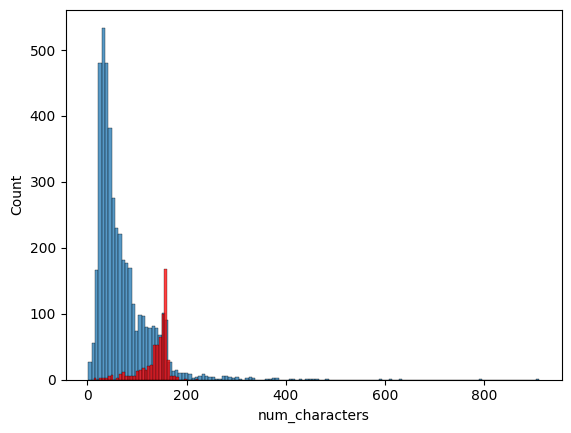

In [ ]:
sns.histplot(sd[sd['target']==0]['num_characters'])
sns.histplot(sd[sd['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

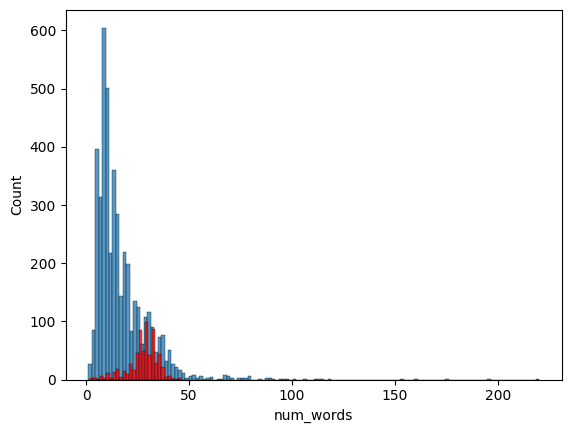

In [ ]:
sns.histplot(sd[sd['target']==0]['num_words'])
sns.histplot(sd[sd['target']==1]['num_words'],color='red')

<ipython-input-22-16be9ea9fce7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

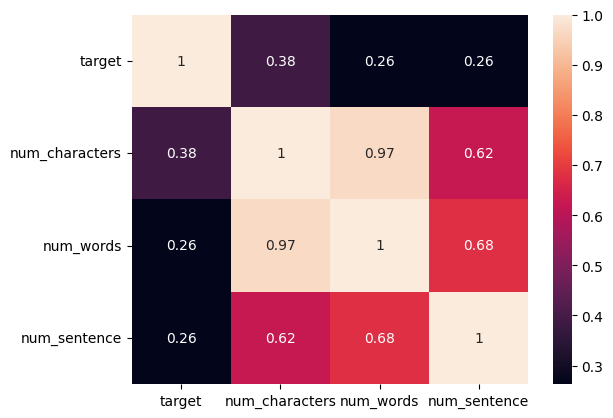

In [ ]:
sns.heatmap(sd.corr(),annot=True)

Since num_words and num_characters have high collinearity, we are removing one of these column as it can be responsible for overfitting of data.

In [ ]:
sd.drop(columns='num_words',inplace=True)

<ipython-input-24-16be9ea9fce7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

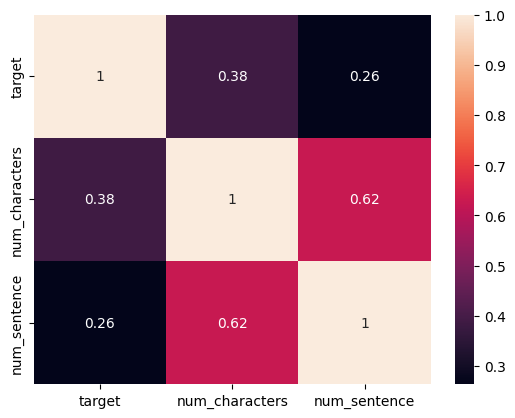

In [ ]:
sns.heatmap(sd.corr(),annot=True)

# **3. DATA PREPROCESSING**

In [ ]:
def preprocess(sms):
    #removing non alphabetic characters
    sms=re.sub(r'[^a-zA-Z]',' ',sms)
    #lowering the characters
    lines=''.join(char.lower() for char in sms if char not in punct)
    #creating tokenized list of characters
    tokenized_lines=word_tokenize(lines)
    #Removing stopwords
    remove_stopwords=[word for word in tokenized_lines if word not in stopw]
    lemmatized_words=[]
    for i in remove_stopwords:
        lemmatized_words.append(wn.lemmatize(i))
    final_data=' '.join(lemmatized_words)
    return final_data
sd['processed']=sd['text'].apply(lambda x: preprocess(x))

In [ ]:
sd.sample(5)

,target,text,num_characters,num_sentence,processed
372,0,I'm going for bath will msg you next &lt;#&gt...,54,1,going bath msg next lt gt min
2338,0,"Alright, see you in a bit",25,1,alright see bit
1834,0,I have a rather prominent bite mark on my righ...,53,1,rather prominent bite mark right cheek
2861,1,Adult 18 Content Your video will be with you s...,52,1,adult content video shortly
5016,1,Dear 0776xxxxxxx U've been invited to XCHAT. T...,154,3,dear xxxxxxx u invited xchat final attempt con...


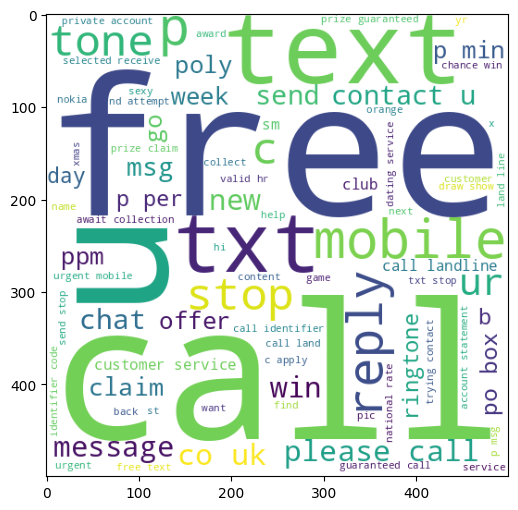

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(sd[sd['target']==1]['processed'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

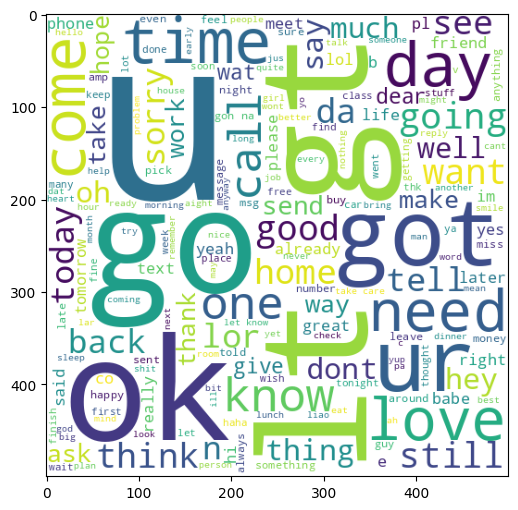

In [ ]:
ham_wc=wc.generate(sd[sd['target']==0]['processed'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
spam_words=[]
for msg in sd[sd['target']==1]['processed'].tolist():
  for word in msg.split():
    spam_words.append(word)

<Axes: xlabel='0', ylabel='1'>

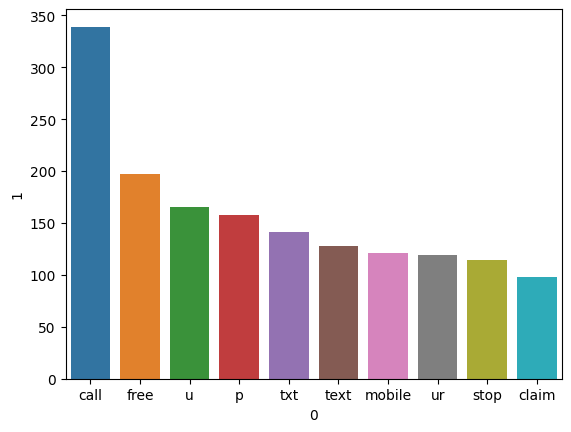

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(10))[0],y=pd.DataFrame(Counter(spam_words).most_common(10))[1])

In [ ]:
ham_words=[]
for msg in sd[sd['target']==0]['processed'].tolist():
  for word in msg.split():
    ham_words.append(word)

<Axes: xlabel='0', ylabel='1'>

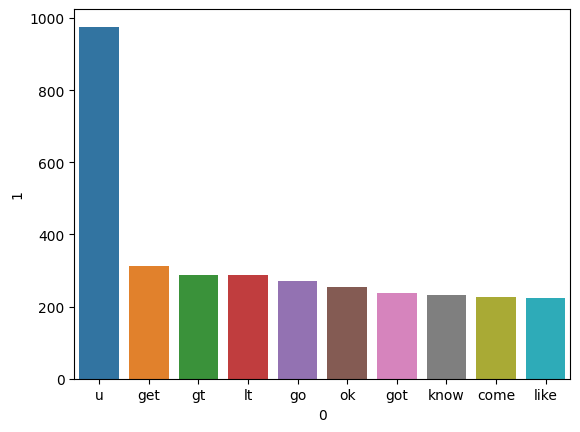

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(10))[0],y=pd.DataFrame(Counter(ham_words).most_common(10))[1])

# **4. MODEL BUILDING**

In [ ]:
x=cv.fit_transform(sd['processed']).toarray()

In [ ]:
x.shape

(5169, 7017)

In [ ]:
y=sd['target'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  89.07156673114119
[[805  91]
 [ 22 116]]
Precision:  56.038647342995176


In [ ]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  96.42166344294004
[[870  26]
 [ 11 127]]
Precision:  83.00653594771242


In [ ]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.38878143133462
[[891   5]
 [ 22 116]]
Precision:  95.86776859504133


As we can see above BNB has highest precision and accuracy score. Being the data imbalanced, the precision should be high and is our priority. Now, we are going to now use tfidf vectorizer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()

In [ ]:
x=cv.fit_transform(sd['processed']).toarray()

In [ ]:
x.shape

(5169, 7017)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  88.87814313346229
[[805  91]
 [ 24 114]]
Precision:  55.60975609756098


In [ ]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  96.22823984526111
[[896   0]
 [ 39  99]]
Precision:  100.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.38878143133462
[[891   5]
 [ 22 116]]
Precision:  95.86776859504133


We can see by using tfidf we have 100% precision by using MNB. Hence we are going to use MNB. Now we need to enhance the model's accuracy.

Now we need to check wether the other colums helps in increasing model's accuracy and also how many max features are giving best result.

In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x=np.hstack((x,sd['num_characters'].values.reshape(-1,1)))
  x=np.hstack((x,sd['num_sentence'].values.reshape(-1,1)))
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  mnb.fit(x_train,y_train)
  y_pred=mnb.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  97.58220502901354
[[893   3]
 [ 22 116]]
Precision:  97.47899159663865

For max Features:  2000
Accuracy:  96.90522243713733
[[894   2]
 [ 30 108]]
Precision:  98.18181818181819

For max Features:  3000
Accuracy:  94.77756286266924
[[895   1]
 [ 53  85]]
Precision:  98.83720930232558

For max Features:  4000
Accuracy:  92.06963249516441
[[896   0]
 [ 82  56]]
Precision:  100.0

For max Features:  5000
Accuracy:  88.20116054158608
[[896   0]
 [122  16]]
Precision:  100.0



In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  mnb.fit(x_train,y_train)
  y_pred=mnb.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  97.48549323017409
[[892   4]
 [ 22 116]]
Precision:  96.66666666666667

For max Features:  2000
Accuracy:  97.29206963249516
[[894   2]
 [ 26 112]]
Precision:  98.24561403508771

For max Features:  3000
Accuracy:  97.09864603481626
[[895   1]
 [ 29 109]]
Precision:  99.0909090909091

For max Features:  4000
Accuracy:  97.00193423597679
[[896   0]
 [ 31 107]]
Precision:  100.0

For max Features:  5000
Accuracy:  96.71179883945842
[[896   0]
 [ 34 104]]
Precision:  100.0



Above we did the hyperparameter tuning in Tfidf vectorizer with max_features. We get the value 4000 in max_features gives high accuracy with no change in precision. Also, the other columns decreases the accuracy of model, hence we will not going to add it as a deciding variable.

best max_feature for mnb without hyperparameter tuning
1. cv=TfidfVectorizer(max_features=4000)
2. x=cv.fit_transform(sd['processed']).toarray()
3. y=sd['target'].values
4. x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x=np.hstack((x,sd['num_characters'].values.reshape(-1,1)))
  x=np.hstack((x,sd['num_sentence'].values.reshape(-1,1)))
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  95.35783365570599
[[873  23]
 [ 25 113]]
Precision:  83.08823529411765

For max Features:  2000
Accuracy:  95.55125725338492
[[875  21]
 [ 25 113]]
Precision:  84.32835820895522

For max Features:  3000
Accuracy:  95.35783365570599
[[871  25]
 [ 23 115]]
Precision:  82.14285714285714

For max Features:  4000
Accuracy:  95.16441005802709
[[870  26]
 [ 24 114]]
Precision:  81.42857142857143

For max Features:  5000
Accuracy:  95.74468085106383
[[876  20]
 [ 24 114]]
Precision:  85.07462686567165



In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  95.74468085106383
[[875  21]
 [ 23 115]]
Precision:  84.55882352941177

For max Features:  2000
Accuracy:  95.45454545454545
[[872  24]
 [ 23 115]]
Precision:  82.73381294964028

For max Features:  3000
Accuracy:  95.64796905222437
[[874  22]
 [ 23 115]]
Precision:  83.94160583941606

For max Features:  4000
Accuracy:  95.55125725338492
[[876  20]
 [ 26 112]]
Precision:  84.84848484848484

For max Features:  5000
Accuracy:  95.84139264990328
[[876  20]
 [ 23 115]]
Precision:  85.18518518518519



best max_feature for dt without hyperparameter tuning
1. cv=TfidfVectorizer(max_features=5000)
2. x=cv.fit_transform(sd['processed']).toarray()
3. y=sd['target'].values
4. x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x=np.hstack((x,sd['num_characters'].values.reshape(-1,1)))
  x=np.hstack((x,sd['num_sentence'].values.reshape(-1,1)))
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  95.74468085106383
[[875  21]
 [ 23 115]]
Precision:  84.55882352941177

For max Features:  2000
Accuracy:  94.87427466150871
[[871  25]
 [ 28 110]]
Precision:  81.48148148148148

For max Features:  3000
Accuracy:  95.06769825918762
[[869  27]
 [ 24 114]]
Precision:  80.85106382978722

For max Features:  4000
Accuracy:  95.45454545454545
[[871  25]
 [ 22 116]]
Precision:  82.26950354609929

For max Features:  5000
Accuracy:  95.45454545454545
[[874  22]
 [ 25 113]]
Precision:  83.7037037037037



In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  91.87620889748548
[[896   0]
 [ 84  54]]
Precision:  100.0

For max Features:  2000
Accuracy:  91.29593810444874
[[896   0]
 [ 90  48]]
Precision:  100.0

For max Features:  3000
Accuracy:  91.00580270793037
[[896   0]
 [ 93  45]]
Precision:  100.0

For max Features:  4000
Accuracy:  90.9090909090909
[[896   0]
 [ 94  44]]
Precision:  100.0

For max Features:  5000
Accuracy:  90.81237911025146
[[896   0]
 [ 95  43]]
Precision:  100.0



best max_feature for knn without hyperparameter tuning
1. cv=TfidfVectorizer(max_features=1000)
2. x=cv.fit_transform(sd['processed']).toarray()
3. y=sd['target'].values
4. x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x=np.hstack((x,sd['num_characters'].values.reshape(-1,1)))
  x=np.hstack((x,sd['num_sentence'].values.reshape(-1,1)))
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  rf.fit(x_train,y_train)
  y_pred=rf.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  97.96905222437138
[[893   3]
 [ 18 120]]
Precision:  97.5609756097561

For max Features:  2000
Accuracy:  97.77562862669245
[[895   1]
 [ 22 116]]
Precision:  99.14529914529915

For max Features:  3000
Accuracy:  97.58220502901354
[[895   1]
 [ 24 114]]
Precision:  99.1304347826087

For max Features:  4000
Accuracy:  97.29206963249516
[[896   0]
 [ 28 110]]
Precision:  100.0

For max Features:  5000
Accuracy:  97.38878143133462
[[895   1]
 [ 26 112]]
Precision:  99.11504424778761



In [ ]:
max=[1000,2000,3000,4000,5000]
for i in max:
  print("For max Features: ",i)
  cv=TfidfVectorizer(max_features=i)
  x=cv.fit_transform(sd['processed']).toarray()
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  rf.fit(x_train,y_train)
  y_pred=rf.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
  print(confusion_matrix(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred)*100)
  print()

For max Features:  1000
Accuracy:  97.09864603481626
[[890   6]
 [ 24 114]]
Precision:  95.0

For max Features:  2000
Accuracy:  97.38878143133462
[[893   3]
 [ 24 114]]
Precision:  97.43589743589743

For max Features:  3000
Accuracy:  97.678916827853
[[894   2]
 [ 22 116]]
Precision:  98.30508474576271

For max Features:  4000
Accuracy:  97.678916827853
[[895   1]
 [ 23 115]]
Precision:  99.13793103448276

For max Features:  5000
Accuracy:  97.678916827853
[[896   0]
 [ 24 114]]
Precision:  100.0



Best params for random forest before hypertuning
1. cv=TfidfVectorizer(max_features=5000)
2. x=cv.fit_transform(sd['processed']).toarray()
3. y=sd['target'].values
4. x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x.shape

(5169, 5000)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# **Hyperparameter Tuning of MultiNomial Naive Bayes**

In [ ]:
cv=TfidfVectorizer(max_features=4000)
x=cv.fit_transform(sd['processed']).toarray()
y=sd['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=mnb.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.00193423597679
[[896   0]
 [ 31 107]]
Precision:  100.0


In [ ]:
n_alpha=[float(z) for z in np.linspace(start=1,stop=3,num=3)]
n_fit_prior=[True,False]
n_class_prior=[None]
n_force_alpha=[True,False]
random_grid={
    'alpha':n_alpha,
    'class_prior':n_class_prior,
    'fit_prior':n_fit_prior,
    'force_alpha':n_force_alpha
    }
print(random_grid)

{'alpha': [1.0, 2.0, 3.0], 'class_prior': [None], 'fit_prior': [True, False], 'force_alpha': [True, False]}


In [ ]:
mnb_randomcv=RandomizedSearchCV(estimator=mnb,param_distributions=random_grid)

In [ ]:
mnb_randomcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=MultinomialNB(),
                   param_distributions={'alpha': [1.0, 2.0, 3.0],
                                        'class_prior': [None],
                                        'fit_prior': [True, False],
                                        'force_alpha': [True, False]})

In [ ]:
mnb_randomcv.best_params_

{'force_alpha': False, 'fit_prior': True, 'class_prior': None, 'alpha': 1.0}

In [ ]:
y_pred=mnb_randomcv.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print('Accuracy score: ',accuracy_score(y_test,y_pred)*100)
print('Precision score: ',precision_score(y_test,y_pred)*100)

[[896   0]
 [ 31 107]]
Accuracy score:  97.00193423597679
Precision score:  100.0


In [ ]:
mnb_gscv=GridSearchCV(estimator=mnb,param_grid=random_grid)

In [ ]:
mnb_gscv.fit(x_train,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 2.0, 3.0], 'class_prior': [None],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [ ]:
mnb_gscv.best_params_

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [ ]:
y_pred=mnb_gscv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy score: ',accuracy_score(y_test,y_pred)*100)
print('Precision score: ',precision_score(y_test,y_pred)*100)

[[896   0]
 [ 31 107]]
Accuracy score:  97.00193423597679
Precision score:  100.0


# **HyperParameter Tuning of Decision Tree Classifier**

In [ ]:
cv=TfidfVectorizer(max_features=5000)
x=cv.fit_transform(sd['processed']).toarray()
y=sd['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  95.84139264990328
[[877  19]
 [ 24 114]]
Precision:  85.71428571428571


In [ ]:
random_grid={
    'criterion': ["gini", "entropy"],
    'splitter':["best", "random"],
    "min_samples_split":[2,5,10,15,20],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}

In [ ]:
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [ ]:
dt_gscv=GridSearchCV(estimator=dt,param_grid=random_grid)

In [ ]:
dt_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
y_pred=dt_randomcv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  94.87427466150871
[[883  13]
 [ 40  98]]
Precision:  88.28828828828829


In [ ]:
dt_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 20,
 'criterion': 'entropy'}

In [ ]:
dt_gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']})

In [ ]:
y_pred=dt_gscv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  95.06769825918762
[[884  12]
 [ 39  99]]
Precision:  89.1891891891892


# **Hyperparameter tuning of KNN classifier**

In [ ]:
cv=TfidfVectorizer(max_features=1000)
x=cv.fit_transform(sd['processed']).toarray()
y=sd['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  91.87620889748548
[[896   0]
 [ 84  54]]
Precision:  100.0


In [ ]:
random_grid={
    "n_neighbors":[5,10,15,20,25,30],
    "weights":["uniform", "distance"]
    #"algorithm":["auto", "ball_tree", "kd_tree", "brute"] adding this column cause decrease in accuracy
}

In [ ]:
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [ ]:
knn_gscv=GridSearchCV(estimator=knn,param_grid=random_grid)

In [ ]:
knn_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
y_pred=knn_randomcv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  92.84332688588007
[[896   0]
 [ 74  64]]
Precision:  100.0


In [ ]:
knn_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [ ]:
knn_gscv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
y_pred=knn_gscv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  92.84332688588007
[[896   0]
 [ 74  64]]
Precision:  100.0


# **Hyperparameter tuning of Random forest Classifier**

In [ ]:
cv=TfidfVectorizer(max_features=5000)
x=cv.fit_transform(sd['processed']).toarray()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.38878143133462
[[895   1]
 [ 26 112]]
Precision:  99.11504424778761


In [ ]:
random_grid={
    "n_estimators":[100,200,300,400,500],
    'criterion':['gini', 'entropy', 'log_loss']
}

In [ ]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [ ]:
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100, verbose=2)

In [ ]:
y_pred=rf_randomcv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.48549323017409
[[896   0]
 [ 26 112]]
Precision:  100.0


In [ ]:
rf_gscv=GridSearchCV(estimator=rf,param_grid=random_grid)

In [ ]:
rf_gscv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
y_pred=rf_gscv.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  97.29206963249516
[[895   1]
 [ 27 111]]
Precision:  99.10714285714286


# **Voting Classifier**

**The best performin models are MNB, KNN and Random Forest**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
cv=TfidfVectorizer()
x=cv.fit_transform(sd['processed']).toarray()
y=sd['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
voting_clf=VotingClassifier(estimators=[('mnb',mnb),('knn',knn_randomcv),('rf',rf_randomcv)])

In [ ]:
voting_clf.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('knn',
                              RandomizedSearchCV(cv=3,
                                                 estimator=KNeighborsClassifier(),
                                                 n_jobs=-1,
                                                 param_distributions={'n_neighbors': [5,
                                                                                      10,
                                                                                      15,
                                                                                      20,
                                                                                      25,
                                                                                      30],
                                                                      'weights': ['uniform',
                                                                                  'distance']},
                                                 random_state=100, verbose=2)),
                             ('rf',
                              RandomizedSearchCV(cv=3,
                                                 estimator=RandomForestClassifier(),
                                                 n_jobs=-1,
                                                 param_distributions={'criterion': ['gini',
                                                                                    'entropy',
                                                                                    'log_loss'],
                                                                      'n_estimators': [100,
                                                                                       200,
                                                                                       300,
                                                                                       400,
                                                                                       500]},
                                                 random_state=100,
                                                 verbose=2))])

In [ ]:
y_pred=voting_clf.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred)*100)

Accuracy:  96.13152804642166
[[896   0]
 [ 40  98]]
Precision:  100.0
